In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_classification, make_circles, make_moons
from sklearn.cluster import SpectralClustering, KMeans, DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform, cdist
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
import random
sns.set()
import sys
from math import pow

In [2]:
random_state = 170
colors = ['#4bd670', '#496fd6', '#b54e3a', '#a83fba', '#34deeb', '#909174']
max_eigenvectors = 10

Eigenvalues and eigenvectors start in 0

## Problem instances

In [3]:
def first_real():
    global X
    global y
    global n_clusters
    global eigenvecs
    global eps
    
    eps = 1.5
    n_clusters = 3
    eigenvecs = [0,1,2]
    X, y = make_blobs(n_samples=300, random_state=170)

In [4]:
def second_real():
    global X
    global y
    global n_clusters
    global eigenvecs
    global eps
    
    eps = 0.4
    n_clusters = 3
    eigenvecs = [0]
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X, y = make_blobs(n_samples=1000, random_state=170)
    X = np.dot(X, transformation)

In [5]:
def third_real():
    global X
    global y
    global n_clusters
    global eigenvecs
    global eps
    
    eps = 0.3
    n_clusters = 2
    eigenvecs = [0,1]
    X, y = make_classification(
        n_samples=1000,
        n_features=n_clusters,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        random_state=4)

In [6]:
def fourth_real():
    global X
    global y
    global n_clusters
    global eigenvecs
    global eps
    
    eps = 0.1
    n_clusters = 2
    eigenvecs = [0,1]
    X, y = make_circles(n_samples=1500, factor=.5, noise=.05)

In [7]:
def fifth_real():
    global X
    global y
    global n_clusters
    global eigenvecs
    global eps
    
    eps = .1
    n_clusters = 2
    eigenvecs = [0,1]
    X, y = make_moons(n_samples=1500, noise=.05)

In [8]:
def sixth_real():
    global X
    global y
    global n_clusters
    global eigenvecs
    global eps
    
    eps = .4
    n_clusters = 3
    eigenvecs = [0,1,2]
    X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [9]:
def calculate_eigen(sigma=5/38):
    global X
    global y
    global vals
    global vecs
    
    W = np.exp(-cdist(X, X, metric='sqeuclidean') * 1/pow(np.sqrt(sigma), 2))
    D = np.diag(np.sum(np.array(W), axis=1))
    L = D - W

    vals, vecs = np.linalg.eig(L)
    vals = vals.real
    vecs = vecs.real
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]

In [10]:
def plot_comparations():
    f, ax = plt.subplots(1, 5, figsize=(16, 3));

    col_clusters = [colors[i] for i in y]
    ax[0].set_title('Original')
    ax[0].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);

    model = DBSCAN(eps=eps, min_samples=10)
    y_pred = model.fit_predict(X)
    col_clusters = [colors[i] for i in y_pred]
    ax[1].set_title('DBSCAN')
    ax[1].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);

    model = SpectralClustering(n_clusters=n_clusters)
    y_pred = model.fit_predict(X)
    col_clusters = [colors[i] for i in y_pred]
    ax[2].set_title('Spectral Clustering')
    ax[2].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);

    model = KMeans(n_clusters=n_clusters)
    y_pred = model.fit_predict(X)
    col_clusters = [colors[i] for i in y_pred]
    ax[3].set_title('K-means++')
    ax[3].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
    
    U = vecs[:, eigenvecs].reshape(-1, len(eigenvecs))
    km = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
    km.fit(U)
    col_clusters = [colors[i] for i in km.labels_]
    ax[4].set_title('Ours')
    ax[4].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);

In [11]:
def remove_outliers():
    for i in range(max_eigenvectors):
        vec = vecs[:, i]

        # remove outliers
        deviation = 2
        vec_ = [0]
        while len(vec_) != len(vec):
            top = np.mean(vec) + deviation * np.std(vec)
            bottom = np.mean(vec) - deviation * np.std(vec)
            vec_ = vec[(vec >= bottom) & (vec <= top)]
            vec[vec > top] = top
            vec[vec < bottom] = bottom

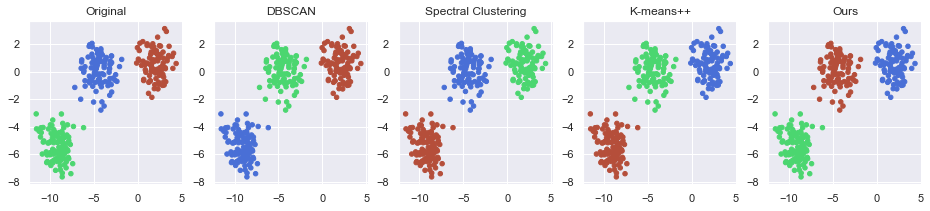

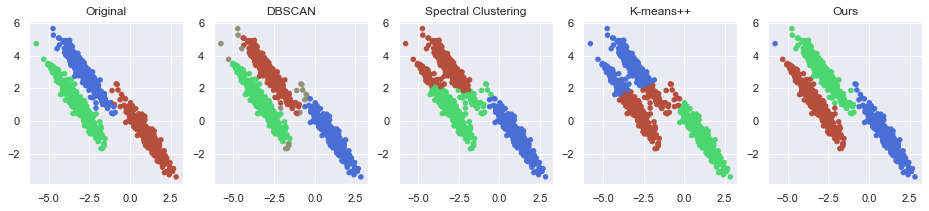

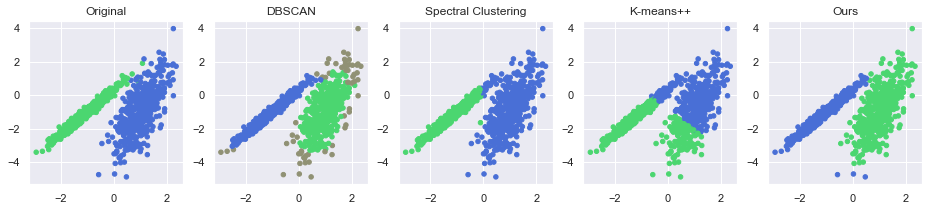

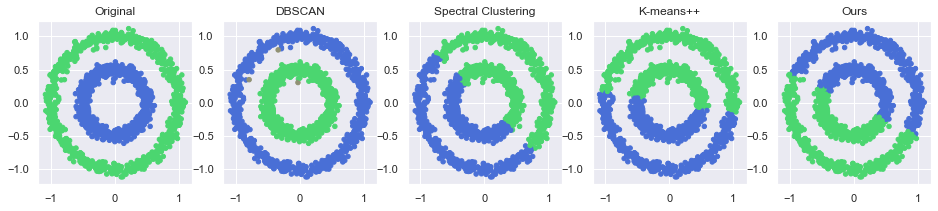

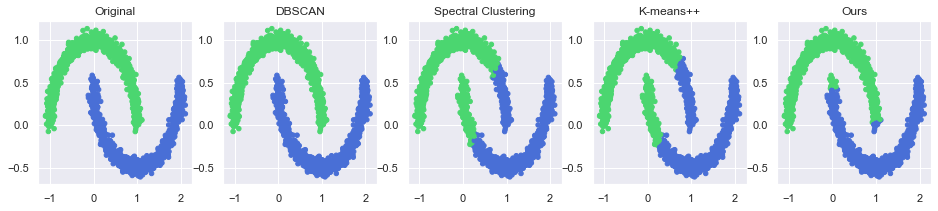

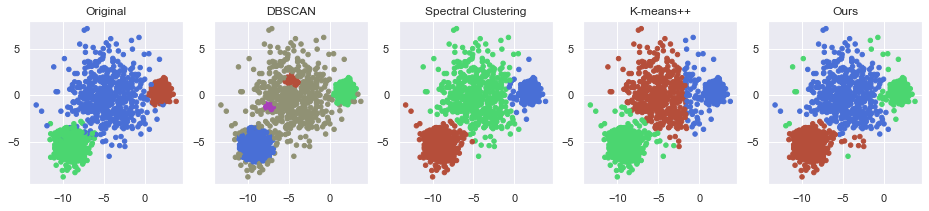

In [12]:
for function in [first_real, second_real, third_real, fourth_real, fifth_real, sixth_real]:
    function()
    calculate_eigen(0.1)
    remove_outliers()
    plot_comparations()